## Primeiro Trabalho Computacional - EDP Parabólica

### Dedução da $g(x)$

Considerando a EDP parabólica:

$$
u_t = u_{xx} + g(x)
$$

E com solução manufaturada:

$$
u(x,t) = e^{-t}cos(x) + x sin(x)
$$

Vamos deduzir a $g(x)$, considerando o problema com condições de contorno de Dirichlet em $x = 0$ e de Neumann em $x = 1$ dadas pela solução proposta, e com condição inicial dada pela solução manufaturada para todo $x$ em $t = 0$.

Da expressão da EDP parabólica, temos que:

$$
g(x) = u_t - u_{xx}
$$

Utilizando a solução manufaturada, obtemos:
$$
u_t = -e^{-t}cos(x)
$$

E

$$
u_{x} = (1 - e^{-t})sin(x) + x cos(x)\\
u_{xx} = (2 - e^{-t})cos(x) - x sin(x)
$$

Portanto, segue que:

$$
g(x) = x sin(x) - 2 cos(x)
$$

### Condições de contorno e condição inicial

Utilizando a solução manufaturada, a condição de contorno de Dirichlet em $x = 0$ nos diz que:

$$
u(0,t) = e^{-t}
$$

Já para a condição de Neumann em $x = 1$, obtemos:

$$
u_{x}(1,t) = (1- e^{-t})sin(1) + cos(1)
$$

Por fim, a condição inicial para todo $x$ em $t = 0$ é dada por:

$$
u(x,0) = cos(x) + x sin(x)
$$.

Com isso, temos o suficiente para iniciar a implementação dos métodos

In [1]:
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
import matplotlib.animation as animation

In [2]:
def manufaturada(x,t):
    return np.exp(-t)*np.cos(x) + x*np.sin(x)

def g(x):
    return x*np.sin(x) - 2*np.cos(x)

def dirichlet(t):
    return np.exp(-t)

def neumann(t):
    return (1 - np.exp(-t))*np.sin(1) + np.cos(1)

In [3]:
def err(nt, nx, w):
    err = np.empty(nt)
    u = np.empty((nt, nx))

    for t in range(nt):    
        for i in range(nx):
            u[t][i] = manufaturada(i*h,t*k)

    err = np.linalg.norm((w - u).flatten(), 2)/(nt*nx)**0.5
    
    return (err, u)

### a) Forward Difference

In [4]:
def forward(x, nt, nx, k, h, yy, g, manufaturada, dirichlet, neumann):
    w_0 = manufaturada(x,0)
    w = np.empty((nt, nx))
    w[0] = w_0.copy()

    for j in range(nt-1):
        w[j+1][0] = dirichlet((j+1)*k)

        for i in range(1,nx-1):
            w[j+1][i] = (1 - 2*yy)*w[j][i] + yy*(w[j][i+1] + w[j][i-1]) + k*g(x[i])

        w[j+1][-1] = (1./3)*(2*h*neumann((j+1)*k) + 4*w[j+1][-2] - w[j+1][-3])
        
    return w

In [89]:
nt = 1001
tf = 1.
lx = 1.
k = tf/(nt-1)
nx = 23
h = lx / (nx-1)
yy = k / (h**2) ##lambda
x = np.linspace(0., lx, nx)

In [53]:
k/h**2

0.484

In [54]:
t1_start_forward = time.process_time()

w_forward = forward(x, nt, nx, k, h, yy, g, manufaturada, dirichlet, neumann) 

t1_end_forward = time.process_time() 

In [55]:
err_forward, u = err(nt, nx, w_forward)

In [56]:
err_forward

0.0008345119279544134

In [57]:
t1_end_forward - t1_start_forward

0.1586056259999964

<IPython.core.display.Javascript object>


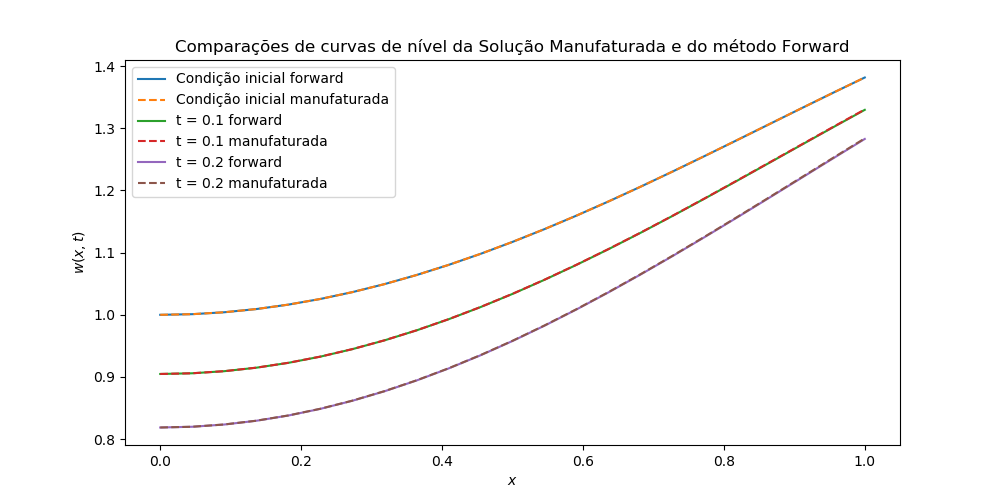

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, w_forward[0], label='Condição inicial forward')
ax.plot(x, manufaturada(x, 0), label='Condição inicial manufaturada', linestyle='dashed')

ax.plot(x, w_forward[int(0.10 / k)], label='t = 0.1 forward')
ax.plot(x, manufaturada(x, 0.1), label='t = 0.1 manufaturada', linestyle='dashed')

ax.plot(x, w_forward[int(0.2 / k)], label='t = 0.2 forward')
ax.plot(x, manufaturada(x, 0.2), label='t = 0.2 manufaturada', linestyle='dashed')

ax.set_title('Comparações de curvas de nível da Solução Manufaturada e do método Forward')
plt.xlabel('$x$')
plt.ylabel('$w(x,t)$')
ax.legend();

In [12]:
t = np.linspace(0., tf, nt)

In [13]:
%matplotlib notebook

In [14]:
T, X = np.meshgrid(t, x)

<IPython.core.display.Javascript object>


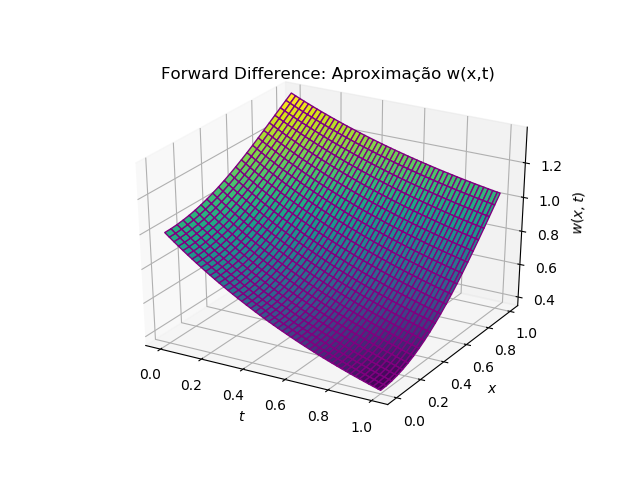

In [15]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
  
fig = plt.figure() 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 
  
# syntax for plotting 
ax.plot_surface(T, X, w_forward.T, cmap ='viridis', edgecolor ='purple') 
ax.set_title('Forward Difference: Aproximação w(x,t)')
ax.set_xlabel('$t$')
ax.set_zlabel('$w(x,t)$')
ax.set_ylabel('$x$')
plt.show() 

<IPython.core.display.Javascript object>


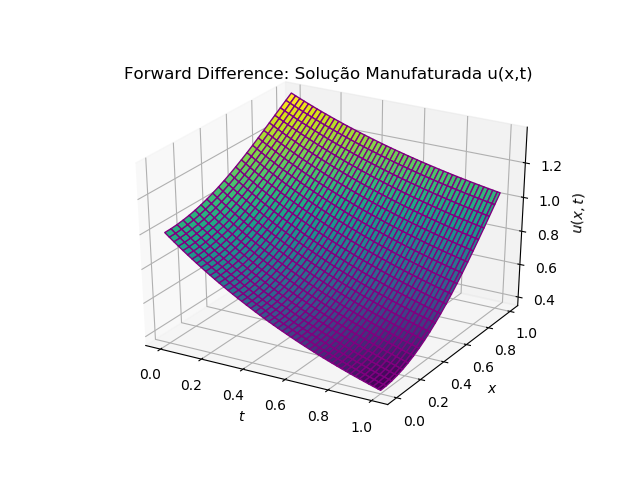

In [16]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
  
fig = plt.figure() 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 
  
# syntax for plotting 
ax.plot_surface(T, X, u.T, cmap ='viridis', edgecolor ='purple') 
ax.set_title('Forward Difference: Solução Manufaturada u(x,t)') 
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_zlabel('$u(x,t)$')
plt.show() 

<IPython.core.display.Javascript object>


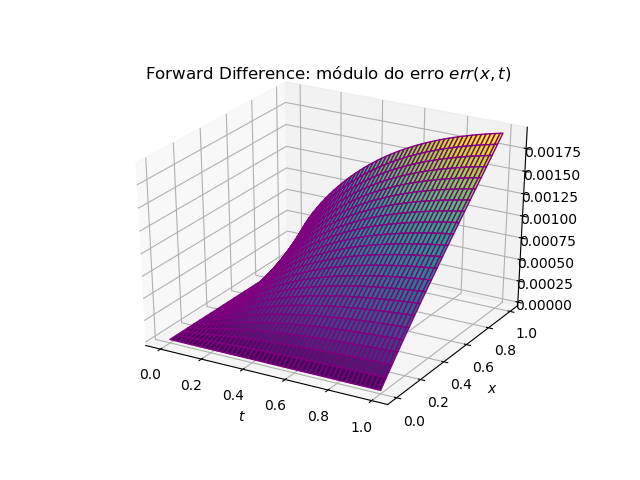

In [17]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
  
fig = plt.figure() 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 
  
# syntax for plotting 
ax.plot_surface(T, X, (abs(w_forward - u)).T, cmap ='viridis', edgecolor ='purple') 
ax.set_title('Forward Difference: módulo do erro $err(x,t)$')
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
plt.show() 

### b) Crank-Nicolson

In [65]:
def crankNicolson(x, nt, nx, k, h, yy, g, manufaturada, dirichlet, neumann):
    params = np.array([(-yy/2)*np.ones(nx-1),(1 + yy)*np.ones(nx),(-yy/2)*np.ones(nx-1)])
    offset = [-1,0,1]
    A = diags(params,offset).toarray()

    paramsB = np.array([(yy/2)*np.ones(nx-1),(1 - yy)*np.ones(nx),(yy/2)*np.ones(nx-1)])
    B = diags(paramsB,offset).toarray()

    A[0][0] = 1
    A[0][1] = 0
    A[-1][-1] = 3
    A[-1][-2] = -4
    A[-1][-3] = 1

    B[0] = np.zeros(nx)
    B[-1] = np.zeros(nx)

    gx = g(x)
    w_0 = manufaturada(x,0)
    w = np.empty((nt, nx))
    w[0] = w_0.copy()

    neubound = np.zeros(nx)
    dirbound = np.zeros(nx)

    for j in range(nt-1):
        kgx = k*g(x)
        kgx[0] = dirichlet((j+1)*k)
        kgx[-1] = 2*h*neumann((j+1)*k)
        w[j+1] = np.linalg.solve(A, np.matmul(B,w[j]) + kgx)
        
    return w

In [92]:
nt = 12
tf = 1.
lx = 1.
k = tf/(nt-1)
nx = 23
h = lx / (nx-1)
yy = k / (h**2)
x = np.linspace(0., lx, nx)

In [79]:
t2_start_crank = time.process_time()

w_crank = crankNicolson(x, nt, nx, k, h, yy, g, manufaturada, dirichlet, neumann)
    
t2_end_crank = time.process_time()

In [80]:
err_crank, u = err(nt, nx, w_crank)

In [81]:
err_crank

0.0008335283761926003

In [82]:
t2_end_crank - t2_start_crank

0.008154681999997138

<IPython.core.display.Javascript object>


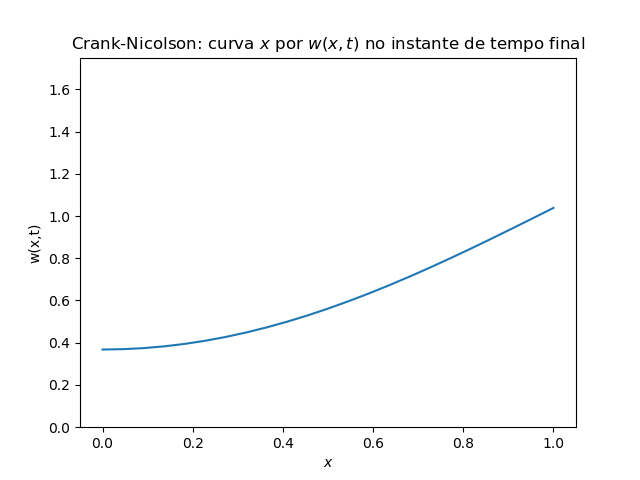

In [83]:
fig, ax = plt.subplots()
ax.set_ylim([0,1.75])
ax.set_title('Crank-Nicolson: curva $x$ por $w(x,t)$ no instante de tempo final')
ax.set_xlabel('$x$')
ax.set_ylabel('w(x,t)')

line, = ax.plot(x, w_crank[0])

def animate(i):
    line.set_ydata(w_crank[i])
    return line,

ani = animation.FuncAnimation(fig, animate, interval=50, blit=True, save_count=50)

plt.show()

In [63]:
t = np.linspace(0., tf, nt)

In [25]:
T, X = np.meshgrid(t, x)

<IPython.core.display.Javascript object>


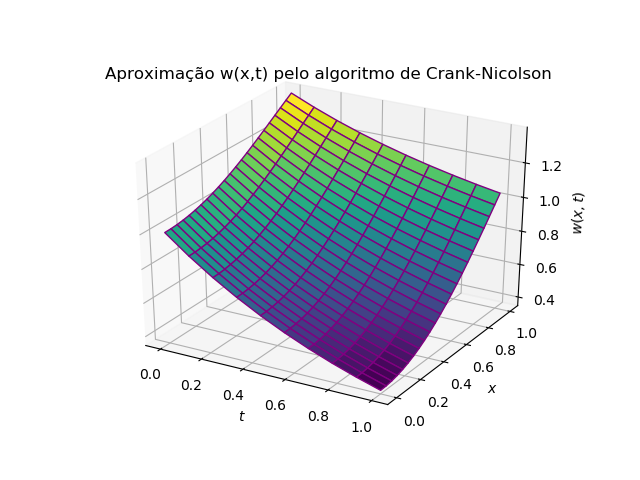

In [26]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
  
fig = plt.figure() 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 
  
# syntax for plotting 
ax.plot_surface(T, X, w_crank.T, cmap ='viridis', edgecolor ='purple') 
ax.set_title('Aproximação w(x,t) pelo algoritmo de Crank-Nicolson')
ax.set_xlabel('$t$')
ax.set_zlabel('$w(x,t)$')
ax.set_ylabel('$x$')
plt.show() 

<IPython.core.display.Javascript object>


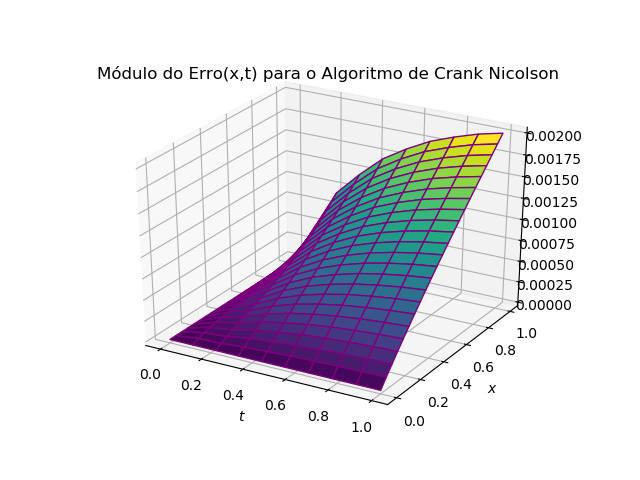

In [27]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
  
fig = plt.figure() 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 
  
# syntax for plotting 
ax.plot_surface(T, X, (abs(w_crank - u)).T, cmap ='viridis', edgecolor ='purple') 
ax.set_title('Módulo do Erro(x,t) para o Algoritmo de Crank Nicolson')
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
plt.show() 

In [28]:
ordemCrank = pd.DataFrame(columns=['$nx$', '$h$', '$nt$', '$\Delta t$',
                                   'Tempo (s)', 'Erro (Norma 2)', '$\sim$ Ordem'])

In [29]:
for i in range(3):
    tf = 1.
    lx = 1.
    nt = ((2**i) * 250) + 1
    nx = ((2**i)*20) + 1
    h = lx / (nx-1)
    k = tf/(nt-1)
    yy = k / (h**2)
    
    x = np.linspace(0., lx, nx)

    t2_start_crank = time.process_time()

    w_crank = crankNicolson(x, nt, nx, k, h, yy, g, manufaturada, dirichlet, neumann)

    t2_end_crank = time.process_time()

    err_crank, u = err(nt, nx, w_crank)
    
    runtime = t2_end_crank - t2_start_crank
    
    if (i == 0):
        ordemCrank.loc[len(ordemCrank)] =  [nx, h, nt, tf/(nt - 1), runtime, err_crank, '-']
    else:
        ordemCrank.loc[len(ordemCrank)] =  [nx, h, nt, tf/(nt - 1), runtime, err_crank,
                                            ordemCrank.iloc[i-1][5] / err_crank]

In [30]:
ordemCrank

,$nx$,$h$,$nt$,$\Delta t$,Tempo (s),Erro (Norma 2),$\sim$ Ordem
0,21,0.0500,251,0.004,0.042971,0.000933,-
1,41,0.0250,501,0.002,0.094464,0.000233,4.00026
2,81,0.0125,1001,0.001,0.349916,0.000058,4.00054
